In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7131478327979185197
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13029234208381262235
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3055235891
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16553770252419811788
physical_device_desc: "device: 0, name: GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 584788307749223635
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

In [25]:
# pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)



In [6]:
X_train = np.load("./X_train_44100.npy")
X_test = np.load("./X_test_44100.npy")
y_train = np.load("./y_train_44100.npy")
y_test = np.load("./y_test_44100.npy")

In [7]:
X_train.shape, X_test.shape

((80345, 128, 128, 1), (34435, 128, 128, 1))

In [8]:
a = np.concatenate((X_train, X_test), axis = 0)
a.shape

(114780, 128, 128, 1)

In [9]:
X_train = a[:-1000, ...]
X_test = a[-1000:, ...]

In [10]:
X_train.shape, X_test.shape

((113780, 128, 128, 1), (1000, 128, 128, 1))

In [11]:
b = np.concatenate( (y_train, y_test), axis = 0)
b.shape

(114780,)

In [12]:
y_train = b[:-1000, ...]
y_test = b[-1000:, ...]

In [13]:
y_train.shape, y_test.shape

((113780,), (1000,))

In [14]:
print("Original array:")
print(b[-1000:])
unique_elements, counts_elements = np.unique(b[-1000:], return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Original array:
[2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 0 0 0 0 0 1 1 1 1 1 3 3 3 3 3 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 4 4 4 4 4 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 4 4 4 4 4 3 3 3 3 3 0 0 0
 0 0 4 4 4 4 4 3 3 3 3 3 0 0 0 0 0 1 1 1 1 1 4 4 4 4 4 3 3 3 3 3 0 0 0 0 0
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 3 3
 3 3 3 3 3 3 3 3 1 1 1 1 1 4 4 4 4 4 1 1 1 1 1 0 0 0 0 0 3 3 3 3 3 4 4 4 4
 4 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 3
 3 3 3 3 2 2 2 2 2 1 1 1 1 1 4 4 4 4 4 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 4 4 4
 4 4 2 2 2 2 2 4 4 4 4 4 2 2 2 2 2 4 4 4 4 4 3 3 3 3 3 1 1 1 1 1 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 4 4 4 4 4 4 4
 4 4 4 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 4 4 4 4 4 2 2 2 2 2 1 1 1 1 1 0 0 0 0
 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 3 3 3 3 3 2
 2 2 2 2 

In [15]:
import keras
from keras.layers import Dense, Conv2D, SeparableConv2D, Convolution2D, AveragePooling2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Dropout, BatchNormalization, Flatten, Input
from keras.models import Model, Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [16]:
def samplewise_normalize_audio_X(X):
    for i in range(len(X)):
        X[i] -= np.min(X[i])
        X[i] /= (np.max(np.abs(X[i])) + 1.0)

In [17]:
from keras.utils import to_categorical

def load_audio_datafiles(X_or_XX_file, y_file, normalize):
    X_or_XX, y = X_or_XX_file, to_categorical(y_file)
    if normalize:
        print(' normalize samplewise')
        if len(X_or_XX.shape) == 5:
            for X in X_or_XX: # it is XX
                samplewise_normalize_audio_X(X)
        else:
            samplewise_normalize_audio_X(X_or_XX) # it is X
    return X_or_XX, y

In [18]:
# 3. Load all dataset & normalize
X_train, y_train = load_audio_datafiles(X_train, y_train, normalize=True)
X_test, y_test = load_audio_datafiles(X_test, y_test, normalize=True)
print('Loaded train:test = {}:{} samples.'.format(len(X_train), len(X_test)))

 normalize samplewise
 normalize samplewise
Loaded train:test = 113780:1000 samples.


In [19]:
base_model = MobileNetV2(weights=None, input_shape=(128,128,1),
                         include_top=False, alpha=0.35)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(loss="categorical_crossentropy",
            optimizer = keras.optimizers.Adam(lr=0.0001),
            metrics=["accuracy"])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 16)   144         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 16)   64          Conv1[0][0]                      
______________________________________________________________________________________________

In [20]:
num_epochs = 100
num_batch_size = 32

In [21]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10, verbose=1, mode='auto')

history = model.fit(X_train, y_train, batch_size=num_batch_size, 
                    epochs=num_epochs, validation_data=(X_test, y_test), 
                    verbose=1, callbacks=[early_stopping],)

model.save("./mobilenetv2_youtube_5cls_44100.h5")
print("save model!")

Epoch 1/100
3556/3556 [==============================] - 166s 47ms/step - loss: 1.4036 - accuracy: 0.3825 - val_loss: 1.6488 - val_accuracy: 0.2400
Epoch 2/100
3556/3556 [==============================] - 162s 45ms/step - loss: 1.2898 - accuracy: 0.4557 - val_loss: 1.4647 - val_accuracy: 0.3710
Epoch 3/100
3556/3556 [==============================] - 158s 45ms/step - loss: 1.1911 - accuracy: 0.5067 - val_loss: 1.3143 - val_accuracy: 0.4710
Epoch 4/100
3556/3556 [==============================] - 157s 44ms/step - loss: 1.0950 - accuracy: 0.5566 - val_loss: 1.2322 - val_accuracy: 0.5070
Epoch 5/100
3556/3556 [==============================] - 160s 45ms/step - loss: 0.9955 - accuracy: 0.6046 - val_loss: 1.2340 - val_accuracy: 0.5200
Epoch 6/100
3556/3556 [==============================] - 159s 45ms/step - loss: 0.9066 - accuracy: 0.6461 - val_loss: 1.0387 - val_accuracy: 0.5830
Epoch 7/100
3556/3556 [==============================] - 157s 44ms/step - loss: 0.8296 - accuracy: 0.6826 - val_

저장한 가중치<br> acc = 약 90%, val_acc = 75~76%

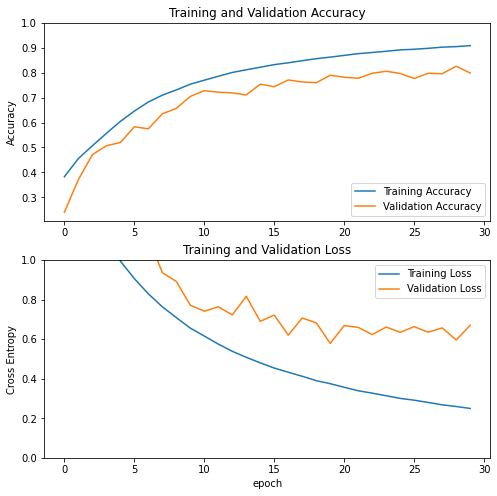

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [29]:
# pip install librosa==0.6.3

  Using cached librosa-0.6.3.tar.gz (1.6 MB)

  Using cached joblib-0.17.0-py3-none-any.whl (301 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Created wheel for librosa: filename=librosa-0.6.3-py3-none-any.whl size=1573321 sha256=86dcd6e930501dd74e611d2bba71a51ac6b30373fa8c7ae1eb2a951d56be1292
  Stored in directory: c:\users\gmlrn\appdata\local\pip\cache\wheels\de\c1\94\619fb8b04ee1f567115662d26650677ecf79bc7d8e462d21f8
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=58b05f851b0e1584e7fc46741ff7bac6d79f492ec58c1b6b9c4d79d9efb06ead
  Stored in directory: c:\users\gmlrn\appdata\local\pip\cache\wheels\ba\7b\eb\213741ccc0678f63e346ab8dff10495995ca3f426af87b8d88
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=970304c540e3b4389f07e3c16dd78146be9805ccf616fc30147cbdcf10ec6d02
  Stored in directory: c:\users\gmlrn\appdata\local\pip\cache\wheels\a0\1

In [35]:
# pip install --user numba==0.48.0

Note: you may need to restart the kernel to use updated packages.
